In [17]:
import datasets
import attention
import matplotlib.pyplot as plt
import torch
import einops
import torchvision

In [2]:
data = datasets.load_dataset("ylecun/mnist")

In [7]:
model_path = "../checkpoints/run_3_vit_model.pth"
model = attention.VisionTransformer(number_classes=10)

model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = model.to(device)

Label:	9
Model Prediction:	9


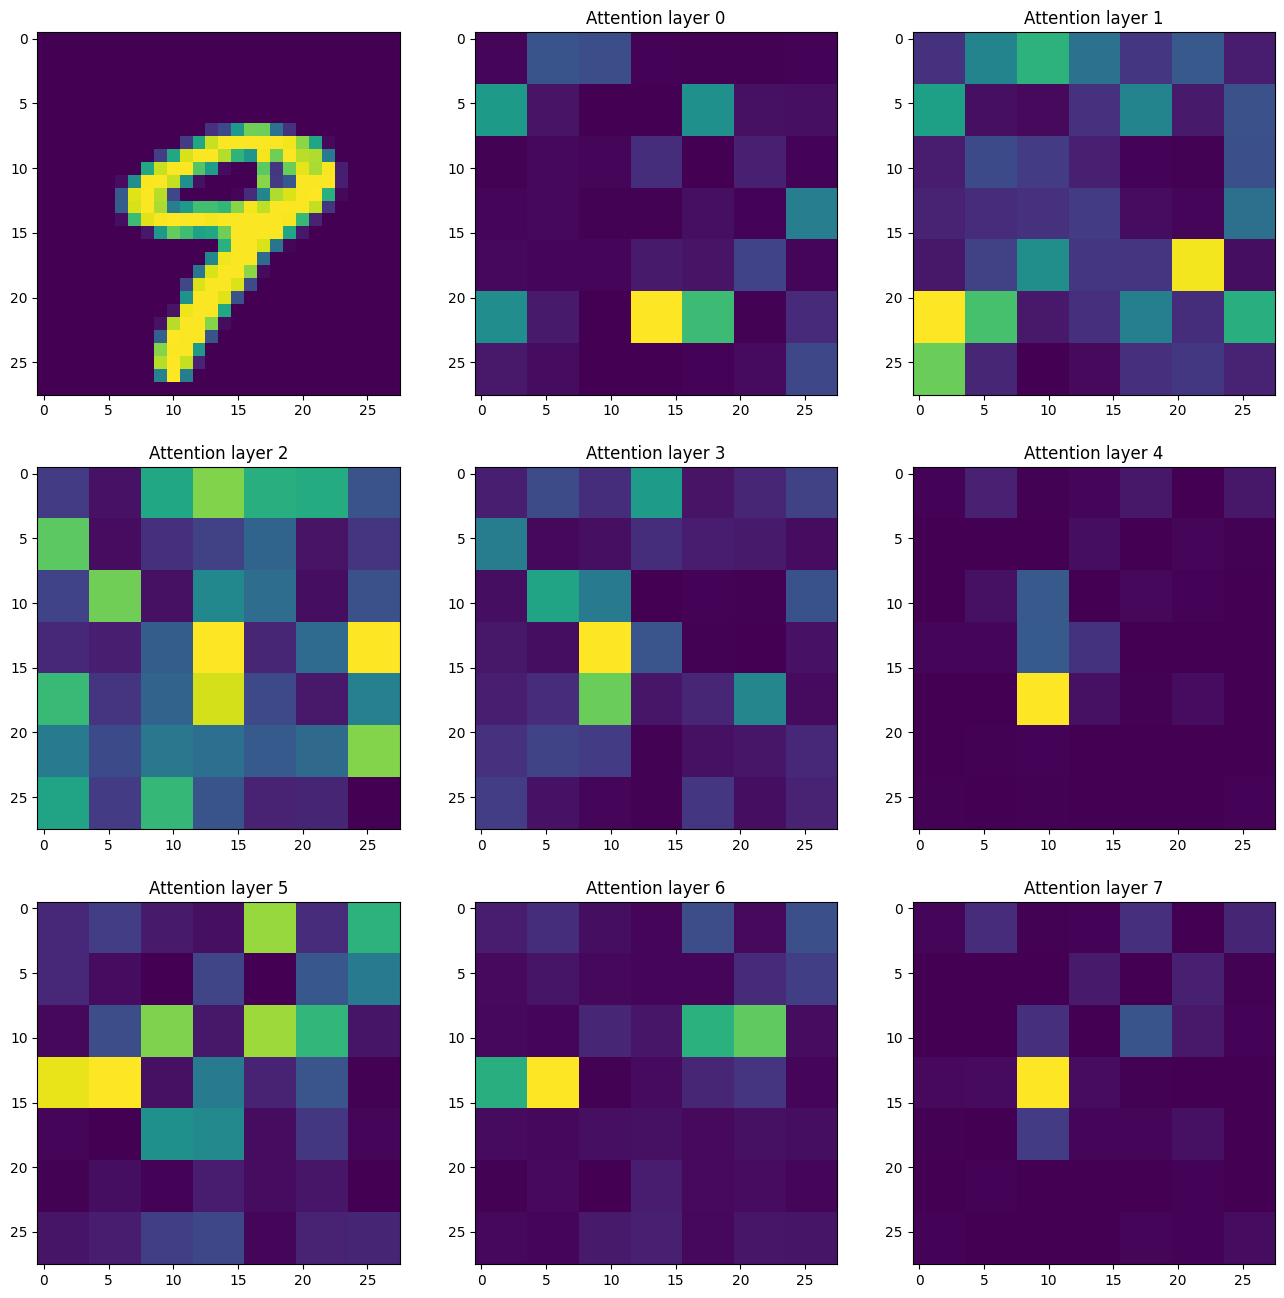

In [95]:
sample_index = 9

sample = data["test"][sample_index]

image = torchvision.transforms.functional.to_tensor(sample["image"])
label = sample["label"]

with torch.no_grad():
    logits, attention = model(image.to(device).unsqueeze(0), return_attention=True)

pred = logits.argmax(dim=1).item()

fig, axes = plt.subplots(3, 3, figsize=(16, 16))

for idx, ax in enumerate(axes.flatten()):
    if idx == 0:
        viz_image = einops.rearrange(image.numpy(), "C H W -> H W C")
        ax.imshow(viz_image)
        continue

    attn = attention[f"layer_{idx-1}"][:, 0, 1:]
    patch_attn = einops.rearrange(attn, "B (H W) -> B H W", H=7, W=7).unsqueeze(0)
    attn_upsampled = (
        torch.nn.functional.interpolate(
            patch_attn,
            size=(28, 28),
            mode="nearest",
        )
        .cpu()
        .numpy()[0, :]
    )

    ax.imshow(attn_upsampled[0, :])
    ax.set_title(f"Attention layer {idx-1}")


print(f"Label:\t{label}")
print(f"Model Prediction:\t{pred}")